In [0]:
!pip install matplotlib seaborn pandas numpy > /dev/null;
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import re

import pandas as pd
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("white", {"axes.grid": False, 'grid.color': '1.0',})
sns.set_context("talk")

[2.998849999999999, 3.1661, 3.17739, 3.2390000000000008, 3.27607, 3.462900000000001, 3.46488, 3.564890000000001, 3.58545, 3.644329999999999, 3.7520000000000007, 3.8185000000000002, 3.8374000000000024, 3.8925, 3.9862, 4.0214, 4.049400000000002, 4.073500000000001, 4.074, 4.09037, 4.09277, 4.1967, 4.20705, 4.2468, 4.254479999999999, 4.2851, 4.2943, 4.294999999999998, 4.3731800000000005, 4.378, 4.468299999999999, 4.4777000000000005, 4.5710799999999985, 4.5886, 4.829399999999998, 5.014800000000001, 5.0328800000000005, 5.281400000000001, 5.28889, 5.440910000000001, 5.570399999999999, 5.6533, 5.6675699999999996, 6.278600000000001, 6.5235, 3.1272400000000005, 3.1644000000000005, 3.2016600000000004, 3.235900000000001, 3.2371799999999995, 3.2965999999999998, 3.30659, 3.3141999999999996, 3.402199999999999, 3.4530499999999997, 3.467799999999997, 3.499500000000001, 3.535, 3.599999999999998, 3.6334500000000016, 3.6792, 3.8512000000000004, 4.05837, 4.081200000000003, 4.133700000000001, 4.26206, 4.308

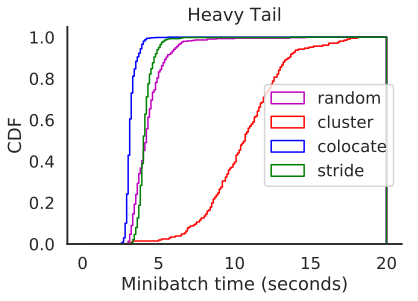

In [0]:
def parse_log(fname='stride_tail.out'):
  regex = r"^(?P<time>[0-9]+(?:.[0-9]+)?):\s+Server #(?P<serverid>[0-9]+) broadcasts parameter update$"
  with open(fname, 'r') as f:
    file = f.read()
  matches = re.finditer(regex, file, re.MULTILINE)
  results = [(int(m.group('serverid')), float(m.group('time'))) for m in matches]
  df = pd.DataFrame(results, columns=['serverid', 'time']).groupby('serverid')
  for serverid, group_df in df:
    group_data = group_df['time'].sort_values().diff()
    yield group_data.dropna()
"""
fig, ax = plt.subplots()
ax2 = ax.twinx()
sdata = sorted(list(pd.concat(parse_log())))
#print(bins[-5:])
n, bins, patches = ax2.hist(sdata, cumulative=1, histtype='step', bins=sorted(bins), color='b', density=True)

ax.set_xlabel("Minibatch time (seconds)")
ax.set_ylabel("CDF")
sns.despine()
plt.savefig('test.png', dpi=300, bbox_inches='tight')"""

tests = ["cluster", "colocate", "stride"]
colors = ['r', 'b', 'g']
r = "random"
end = "_tail.out"

sdata = list()
fig, ax = plt.subplots()

for i in range(1, 11):
  sdata += sorted(list(pd.concat(parse_log(fname=r+"_tail"+str(i) + ".out"))))
 
print(sdata)


n, bins, patches = ax.hist(sdata, 200, range=(0, 20), cumulative=True, density=True, histtype='step', label='random', color='m')



for i in range(len(tests)):
  
  sdata = sorted(list(pd.concat(parse_log(fname=tests[i]+end))))

  ax.hist(sdata, 200, range=(0,20), cumulative=True, density=True, histtype='step', label=tests[i], color=colors[i])

ax.legend(loc='right')
ax.set_title('Heavy Tail')
ax.set_xlabel("Minibatch time (seconds)")
ax.set_ylabel("CDF")
sns.despine()
plt.savefig("tail.pdf", bbox_inches='tight')